In [1]:
import glob
import pandas  as pd
import numpy   as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
import cv2
import torch
from pyimagesearch import config
from pyimagesearch import model
from pyimagesearch import dataset


%matplotlib inline

In [2]:
print(os.getcwd())

/Users/hafeez/Desktop/U-NET_nifti_reading


In [3]:
# base path of the dataset
# nifti testing/Covid-19 lungs nifti
DATASET_PATH = os.path.join(os.getcwd(), "covid19-ct-scans")
DATASET_PATH 

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans'

In [4]:
# define the path to the images and masks dataset 
IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "ct_scans")
MASK_DATASET_PATH = os.path.join(DATASET_PATH, "infection_mask")

In [5]:
#nifti_files_testing/input/covid19-ct-scans/ct_scans
IMAGE_DATASET_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/ct_scans'

In [6]:
#nifti_files_testing/input/covid19-ct-scans/lung_mask
MASK_DATASET_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/infection_mask'

In [7]:
# Read and examine metadata 
#input/covid19-ct-scans/metadata.csv
raw_data = pd.read_csv(r"covid19-ct-scans/metadata_.csv")
raw_data.head(10)

ct_scans                      lung_mask  \
0  ct_scans/coronacases_org_001.nii  lung_mask/coronacases_001.nii   
1  ct_scans/coronacases_org_002.nii  lung_mask/coronacases_002.nii   
2  ct_scans/coronacases_org_003.nii  lung_mask/coronacases_003.nii   
3  ct_scans/coronacases_org_004.nii  lung_mask/coronacases_004.nii   
4  ct_scans/coronacases_org_005.nii  lung_mask/coronacases_005.nii   
5  ct_scans/coronacases_org_006.nii  lung_mask/coronacases_006.nii   
6  ct_scans/coronacases_org_007.nii  lung_mask/coronacases_007.nii   
7  ct_scans/coronacases_org_008.nii  lung_mask/coronacases_008.nii   
8  ct_scans/coronacases_org_009.nii  lung_mask/coronacases_009.nii   
9  ct_scans/coronacases_org_010.nii  lung_mask/coronacases_010.nii   

                       infection_mask  \
0  infection_mask/coronacases_001.nii   
1  infection_mask/coronacases_002.nii   
2  infection_mask/coronacases_003.nii   
3  infection_mask/coronacases_004.nii   
4  infection_mask/coronacases_005.nii   
5  infection_mask/coronacases_006.nii   
6  infection_mask/coronacases_007.nii   
7  infection_mask/coronacases_008.nii   
8  infection_mask/coronacases_009.nii   
9  infection_mask/coronacases_010.nii   

                       lung_and_infection_mask  
0  lung_and_infection_mask/coronacases_001.nii  
1  lung_and_infection_mask/coronacases_002.nii  
2  lung_and_infection_mask/coronacases_003.nii  
3  lung_and_infection_mask/coronacases_004.nii  
4  lung_and_infection_mask/coronacases_005.nii  
5  lung_and_infection_mask/coronacases_006.nii  
6  lung_and_infection_mask/coronacases_007.nii  
7  lung_and_infection_mask/coronacases_008.nii  
8  lung_and_infection_mask/coronacases_009.nii  
9  lung_and_infection_mask/coronacases_010.nii

# loading images in array

In [8]:
# loading images in array
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [9]:
os.path.join(DATASET_PATH, raw_data.loc[0,'ct_scans'])

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/ct_scans/coronacases_org_001.nii'

In [10]:
# Read sample
sample_ct   = read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'ct_scans']))
sample_lung = read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'lung_mask']))
sample_infe = read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'infection_mask']))
sample_all  = read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'lung_and_infection_mask']))

# Size of CT Scan images

In [11]:
sample_ct.shape

(512, 512, 301)

# Plot all all available annotations images - Single slice

In [12]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original CT-scan Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Covid-19 Original Mask')

    plt.subplot(1,4,3)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[2], alpha=0.5, cmap=color_map)
    plt.title('Lungs Mask')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[3], alpha=0.5, cmap=color_map)
    plt.title('Lungs and Covid-19 Infection Mask')
    
    
    plt.show()

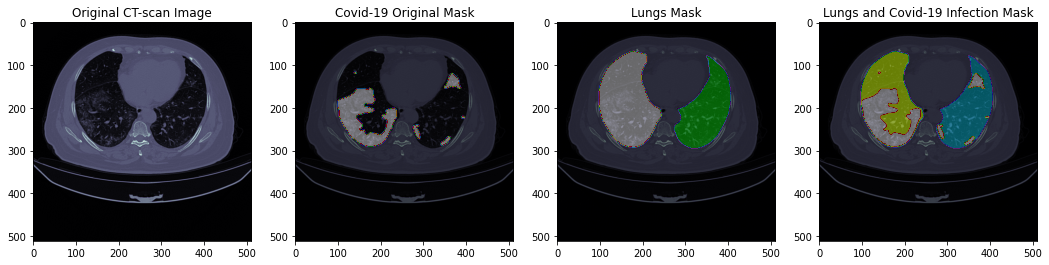

In [13]:
# Examine one slice of a ct scan and its annotations
plot_sample([sample_ct[...,120],  sample_infe[...,120], sample_lung[...,120], sample_all[...,120]])

# Plot all available annotations images - Multiple slices

That's an example from a single slice, lets do the same for multiple slices in the same exam.

In [14]:
def bulk_plot_sample(array_list, index_list):
    '''
    Plots multiple slices, wrapper of plot_sample
    '''
    for index_value in index_list:
        plot_sample([array_list[0][...,index_value], array_list[1][...,index_value], array_list[2][...,index_value], array_list[3][...,index_value]])

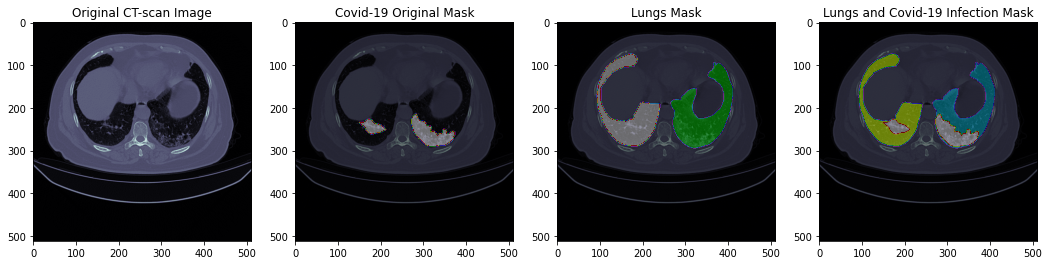

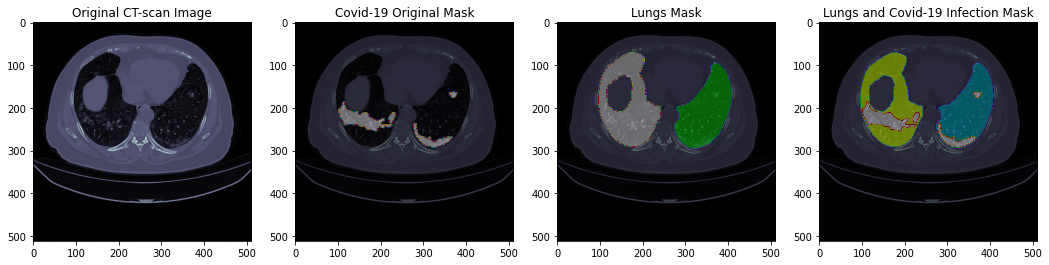

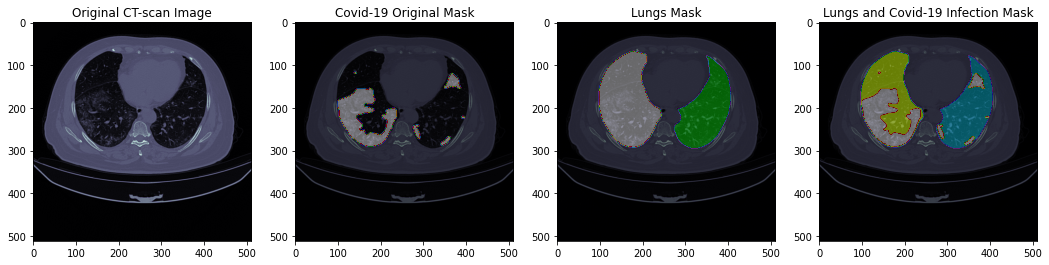

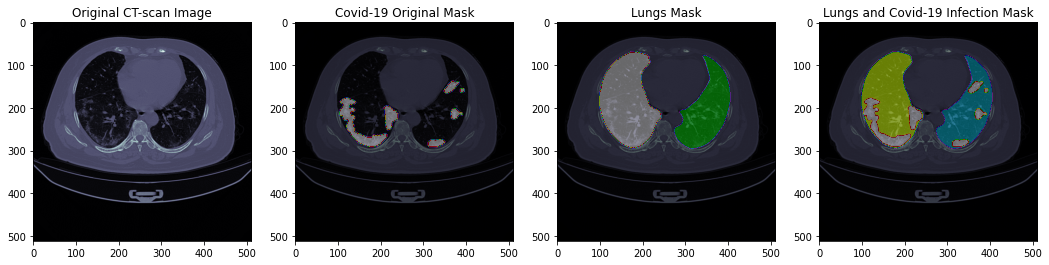

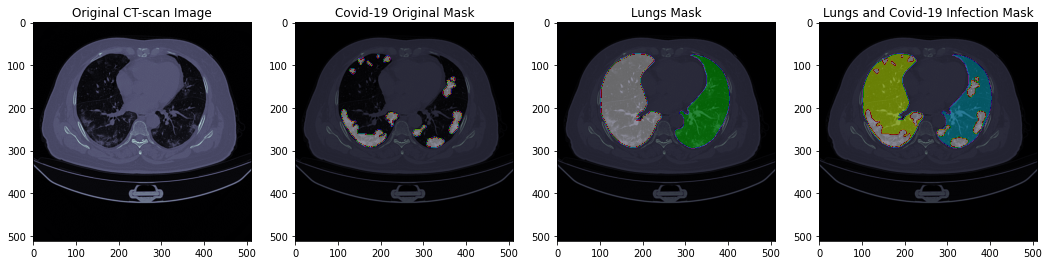

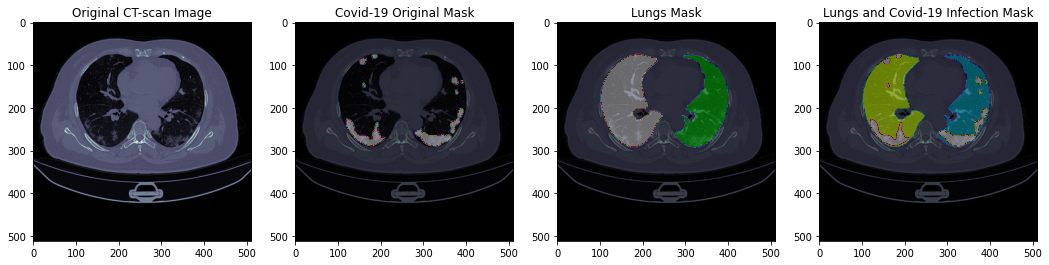

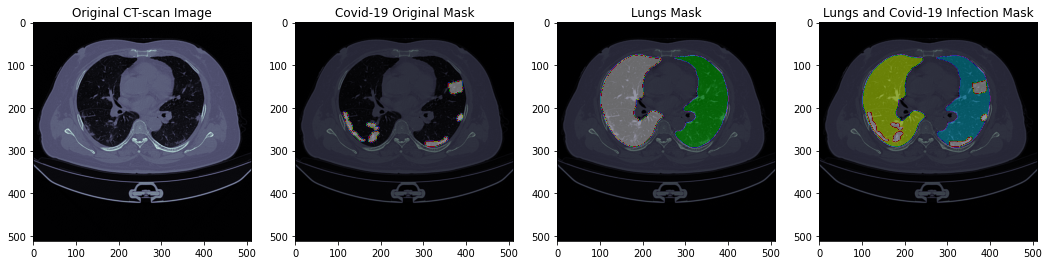

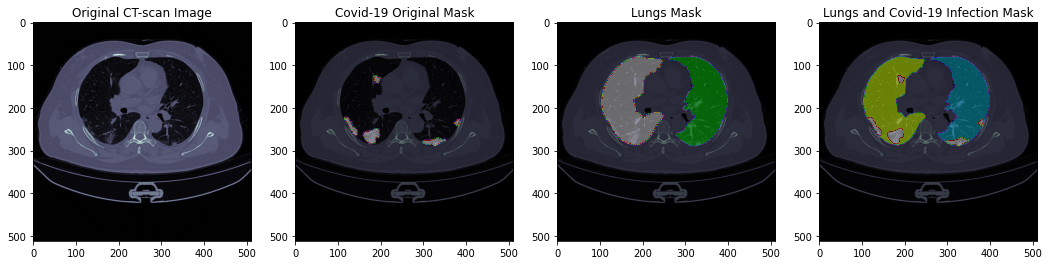

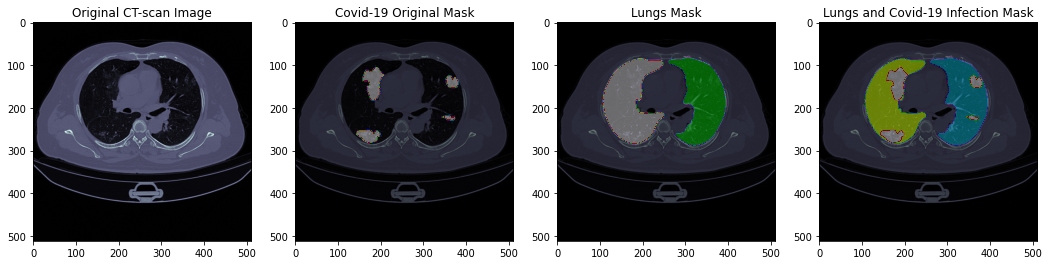

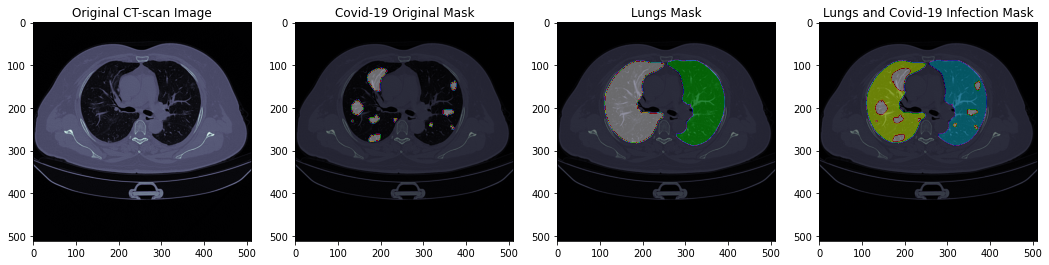

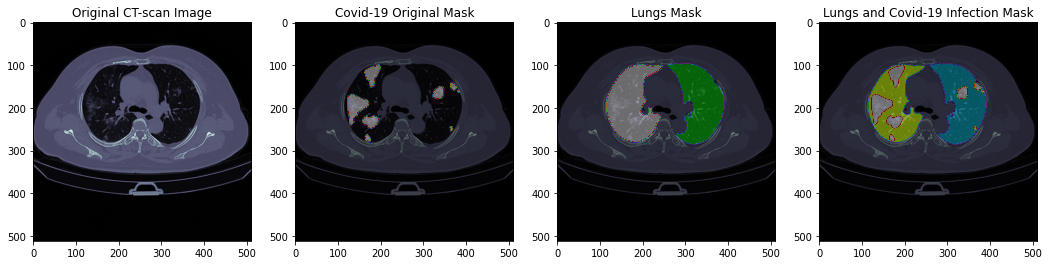

In [15]:
# Examine multiple slices of a ct scan and its annotations
bulk_plot_sample([sample_ct, sample_infe, sample_lung, sample_all], index_list=[100,110,120,130,140,150,160,170,180,190,200]) 

# Plot Original CT Images with Corrensponding Masks - Single Slice

In [16]:
def plt_ctimage_with_mask(array_list, color_map = 'nipy_spectral'):
    
    fig = plt.figure(figsize = (18, 15))
    
    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original CT-scan Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Covid-19 Original Mask')
    
    plt.show()

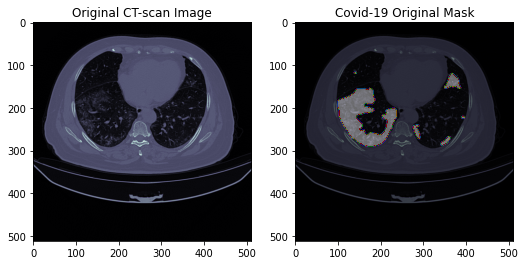

In [17]:
plt_ctimage_with_mask([sample_ct[...,120],sample_infe[...,120]])

# Plot Original CT Images with Corrensponding Masks - Multiple Slice

In [18]:
def plot_img_mask(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original CT-scan Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Covid-19 Original Mask')
    
    plt.show()

In [19]:
def multi_plt_ctimages_with_masks(array_list, index_list):
    '''
    Plots multiple slices, wrapper of plot_sample
    '''
    for index_value in index_list:
        plot_img_mask([array_list[0][...,index_value], array_list[1][...,index_value]])

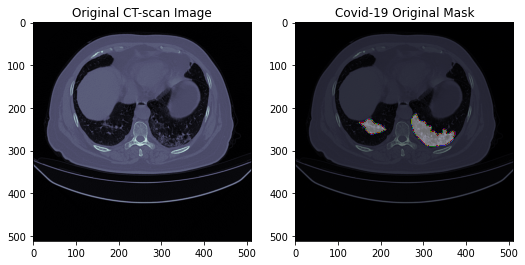

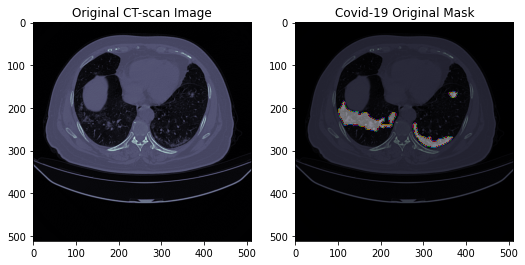

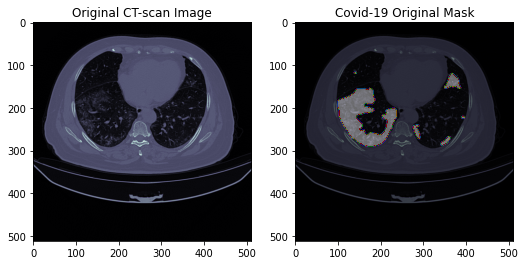

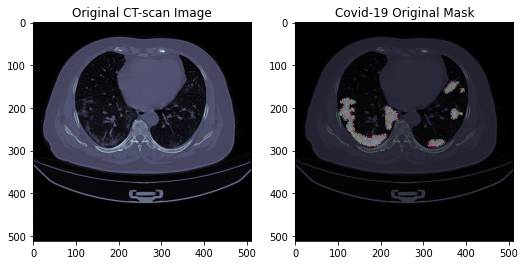

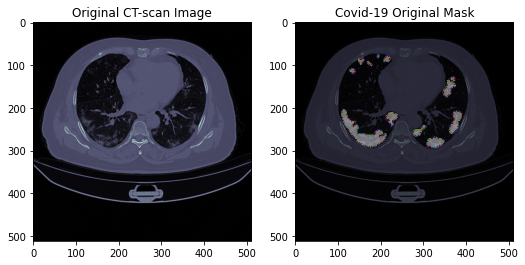

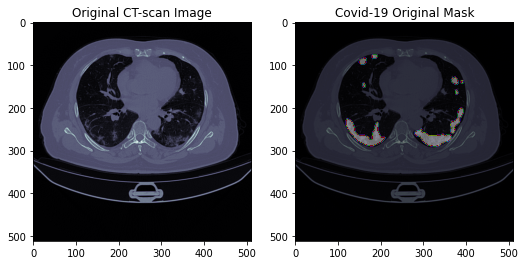

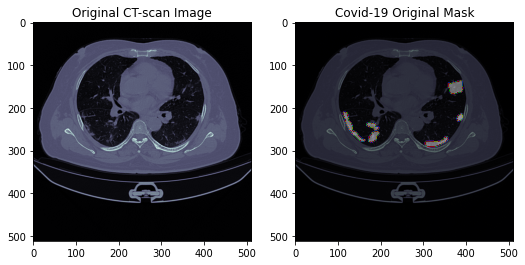

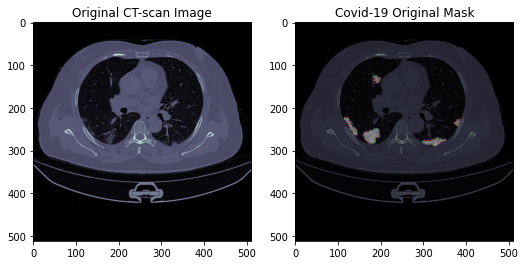

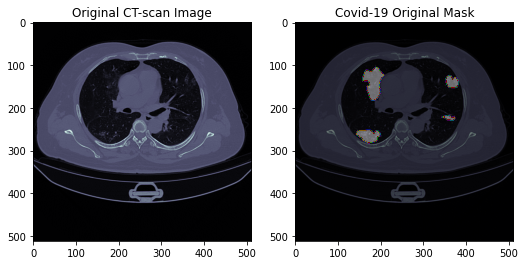

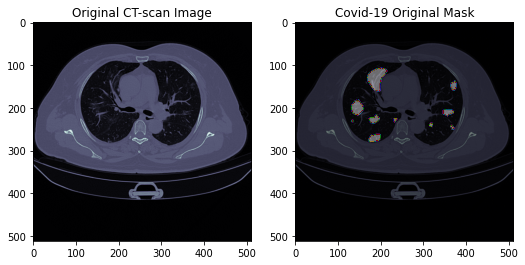

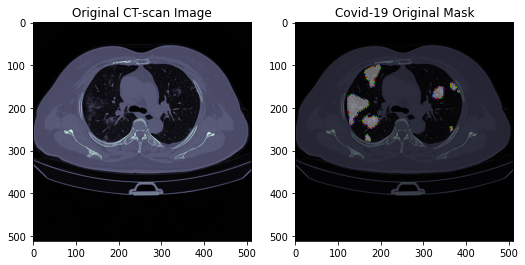

In [20]:
# Examine multiple slices of a ct scan and its corresponding masks
multi_plt_ctimages_with_masks([sample_ct, sample_infe], index_list=[100,110,120,130,140,150,160,170,180,190,200])

# Reshaping Nifti images 128x128 / Resize CT scans & infection masks 

In [21]:
'''
lungs = []
infections = []
img_size = 128

for i in range(len(raw_data)):
    ct_images = read_nii(os.path.join(DATASET_PATH,raw_data['ct_scans'][i]))
    #read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'ct_scans']))
    infect = read_nii(os.path.join(DATASET_PATH,raw_data['infection_mask'][i]))
    
    for ii in range(ct_images.shape[0]):
        lung_img = cv2.resize(ct_images[ii], 
        dsize = (img_size, img_size),interpolation = cv2.INTER_LANCZOS4).astype('uint8')

        infec_img = cv2.resize(infect[ii],
        dsize=(img_size, img_size),interpolation = cv2.INTER_LANCZOS4).astype('uint8')
        
        lungs.append(lung_img[..., np.newaxis])
        infections.append(infec_img[..., np.newaxis])

'''

"\nlungs = []\ninfections = []\nimg_size = 128\n\nfor i in range(len(raw_data)):\n    ct_images = read_nii(os.path.join(DATASET_PATH,raw_data['ct_scans'][i]))\n    #read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'ct_scans']))\n    infect = read_nii(os.path.join(DATASET_PATH,raw_data['infection_mask'][i]))\n    \n    for ii in range(ct_images.shape[0]):\n        lung_img = cv2.resize(ct_images[ii], \n        dsize = (img_size, img_size),interpolation = cv2.INTER_LANCZOS4).astype('uint8')\n\n        infec_img = cv2.resize(infect[ii],\n        dsize=(img_size, img_size),interpolation = cv2.INTER_LANCZOS4).astype('uint8')\n        \n        lungs.append(lung_img[..., np.newaxis])\n        infections.append(infec_img[..., np.newaxis])\n\n"

In [22]:
'''
lungs = np.array(lungs)
infections = np.array(infections)

print(f"The shape of the lung CT scans is {lungs.shape}.")
print(f"The shape of the infection masks is {infections.shape}.")
'''

'\nlungs = np.array(lungs)\ninfections = np.array(infections)\n\nprint(f"The shape of the lung CT scans is {lungs.shape}.")\nprint(f"The shape of the infection masks is {infections.shape}.")\n'

# pyimagesearch - config.py

In [23]:
DATASET_PATH = os.path.join(os.getcwd(), "covid19-ct-scans/dataset","train")
DATASET_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train'

In [24]:
# import the necessary packages
import torch
import os
#/Users/hafeez/Downloads/U-NET_nifti_reading/input/covid19-ct-scans/dataset/train

# base path of the dataset
DATASET_PATH = os.path.join(os.getcwd(), "covid19-ct-scans/dataset","train")

# define the path to the images and masks dataset 
IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "images")
MASK_DATASET_PATH = os.path.join(DATASET_PATH, "masks")

# define the test split
TEST_SPLIT = 0.20

# determine the device to be used for training and evaluation
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# determine if we will be pinning memory during data loading
PIN_MEMORY = True if DEVICE == "cuda" else False

In [25]:
print(os.getcwd())

/Users/hafeez/Desktop/U-NET_nifti_reading


In [26]:
print(os.listdir())

['.DS_Store', 'predict.py', 'nii to png', 'testing_segmentation.ipynb', 'pyimagesearch', 'train.py', 'covid19-ct-scans', '.ipynb_checkpoints', '.git']


In [27]:
print(DATASET_PATH )

/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train


In [28]:
print(IMAGE_DATASET_PATH)

/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images


In [29]:
print(MASK_DATASET_PATH)

/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks


In [30]:
BASE_OUTPUT = os.path.join(DATASET_PATH, "output")
print(BASE_OUTPUT)

/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output


In [31]:
num_workers= os.cpu_count()
print(num_workers)

8


In [32]:
# define the number of channels in the input, number of classes,
# and number of levels in the U-Net model
NUM_CHANNELS = 1
NUM_CLASSES = 1
NUM_LEVELS = 3

# initialize learning rate, number of epochs to train for, and the
# batch size
INIT_LR = 0.001
NUM_EPOCHS = 75
BATCH_SIZE = 64

# define the input image dimensions
INPUT_IMAGE_WIDTH = 128
INPUT_IMAGE_HEIGHT = 128

# define threshold to filter weak predictions
THRESHOLD = 0.5

# define the path to the base output directory
BASE_OUTPUT = os.path.join(DATASET_PATH, "output")

# define the path to the output serialized model, model training
# plot, and testing image paths
MODEL_PATH = os.path.join(BASE_OUTPUT, "unet_covid-19.pth")
LOSS_PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "loss_plot.png"])
ACCURACY_PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "accuracy_plot.png"])
TEST_PATHS = os.path.sep.join([BASE_OUTPUT, "test_paths.txt"])

print("[INFO] all parameters are set for the training...")

[INFO] all parameters are set for the training...


In [33]:
BASE_OUTPUT

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output'

In [34]:
MODEL_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output/unet_covid-19.pth'

In [35]:
TEST_PATHS

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output/test_paths.txt'

In [36]:
LOSS_PLOT_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output/loss_plot.png'

In [37]:
ACCURACY_PLOT_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output/accuracy_plot.png'

# Training Our Segmentation Model (train.py)

In [38]:
'''
! pip install torch torchvision
! pip install matplotlib
! pip install opencv-contrib-python
! pip install imutils
! pip install scikit-learn
! pip install tqdm
'''

'\n! pip install torch torchvision\n! pip install matplotlib\n! pip install opencv-contrib-python\n! pip install imutils\n! pip install scikit-learn\n! pip install tqdm\n'

# import all libraries

In [39]:

from pyimagesearch import config
from pyimagesearch import dataset
from pyimagesearch import model
from pyimagesearch.dataset import SegmentationDataset
from pyimagesearch.model import UNet
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
from torchvision import transforms
import torchvision.transforms as T
from torchvision import models
from torchsummary import summary
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
import io
from os import listdir
from natsort import natsorted



loading our data and structure the data loading pipeline.

In [40]:
# load the image and mask filepaths in a sorted manner
imagePaths = natsorted(list(paths.list_images(config.IMAGE_DATASET_PATH)))
maskPaths = natsorted(list(paths.list_images(config.MASK_DATASET_PATH)))

In [41]:
# path for images
'''
imagePaths
'''

'\nimagePaths\n'

In [42]:
# path for images
'''
maskPaths
'''

'\nmaskPaths\n'

In [43]:
# load the image and mask filepaths in a sorted manner
imagePaths = sorted(list(paths.list_images(config.IMAGE_DATASET_PATH)))
maskPaths = sorted(list(paths.list_images(config.MASK_DATASET_PATH)))

# partition the data into training and testing splits using 85% of
# the data for training and the remaining 15% for testing
split = train_test_split(imagePaths, maskPaths, test_size=config.TEST_SPLIT, random_state=42)

# unpack the data split
(trainImages, testImages) = split[:2]
(trainMasks, testMasks) = split[2:]

# write the testing image paths to disk so that we can use then
# when evaluating/testing our model
print("[INFO] saving testing image paths...")
file = open(config.TEST_PATHS, "w")
file.write("\n".join(testImages))
file.close()

[INFO] saving testing image paths...


Now, we are ready to set up our data loading pipeline.

In [44]:
# define transformations
# ToPILImage(): it enables us to convert our input images to PIL image format. this is necessary since we used OpenCV to load images
# in our custom dataset, but PyTorch expects the input image samples to be in PIL format.
transforms = transforms.Compose([transforms.ToPILImage(), transforms.Resize((config.INPUT_IMAGE_HEIGHT, config.INPUT_IMAGE_WIDTH)),
                                transforms.ToTensor()])
             # normalising the image with random values
             #transforms.Normalize(mean=[0.5], std=[0.5])-> for a greyscale, 3 parameter in case of RGB
             #torchvision.transforms.Grayscale(num_output_channels=1) -> to convert image into RGB

# create the train and test datasets
trainDS = SegmentationDataset(imagePaths=trainImages, maskPaths=trainMasks, transforms=transforms)
testDS = SegmentationDataset(imagePaths=testImages, maskPaths=testMasks, transforms=transforms)

print(f"[INFO] found {len(trainDS)} examples in the training set...")
print(f"[INFO] found {len(testDS)} examples in the test set...")

# create the training and test data loaders
trainLoader = DataLoader(trainDS, shuffle=True,batch_size= config.BATCH_SIZE,pin_memory=config.PIN_MEMORY, num_workers=os.cpu_count())
testLoader = DataLoader(testDS, shuffle=False,batch_size=config.BATCH_SIZE, pin_memory=config.PIN_MEMORY, num_workers=os.cpu_count())

[INFO] found 2064 examples in the training set...
[INFO] found 517 examples in the test set...


Now that we have structured and defined our data loading pipeline, we will initialize our U-Net model and the training parameters.

In [45]:
# initialize our UNet model
unet = UNet().to(config.DEVICE)

# initialize loss function and optimizer
lossFunc = BCEWithLogitsLoss()
opt = Adam(unet.parameters(), lr=config.INIT_LR)

# calculate steps per epoch for training and test set
trainSteps = len(trainDS) // config.BATCH_SIZE
testSteps = len(testDS) // config.BATCH_SIZE

# calculate steps per epoch for training and Validation Accuracy 
len_trainLoader=len(trainLoader)
len_testLoader=len(testLoader)

# initialize a dictionary to store training history
H = {"train_loss": [], "test_loss": [], "train_acc": [], "test_acc": [], "train_iou": [], "test_iou": [], "train_dice": [], "test_dice": [],
    "train_mean_dice": [], "test_mean_dice": []}

In [46]:
print((unet))

UNet(
  (encoder): Encoder(
    (encBlocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
      )
      (1): Block(
        (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      )
      (2): Block(
        (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      )
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Decoder(
    (upconvs): ModuleList(
      (0): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
      (1): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    )
    (dec_blocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), str

In [47]:
summary(unet, (3, INPUT_IMAGE_HEIGHT, INPUT_IMAGE_WIDTH))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 126, 126]             448
              ReLU-2         [-1, 16, 126, 126]               0
            Conv2d-3         [-1, 16, 124, 124]           2,320
             Block-4         [-1, 16, 124, 124]               0
         MaxPool2d-5           [-1, 16, 62, 62]               0
            Conv2d-6           [-1, 32, 60, 60]           4,640
              ReLU-7           [-1, 32, 60, 60]               0
            Conv2d-8           [-1, 32, 58, 58]           9,248
             Block-9           [-1, 32, 58, 58]               0
        MaxPool2d-10           [-1, 32, 29, 29]               0
           Conv2d-11           [-1, 64, 27, 27]          18,496
             ReLU-12           [-1, 64, 27, 27]               0
           Conv2d-13           [-1, 64, 25, 25]          36,928
            Block-14           [-1, 64,

# Model accuracy function

# calculate Accuracy

In [48]:
def calculate_accuracy(pred, mask):
    
    pred = torch.argmax(F.softmax(pred, dim=1), dim=1)
    correct = torch.eq(pred, mask).int()
    accuracy = float(correct.sum()) / float(correct.numel())
    return accuracy

# Calculate IoU score  = (|X ∩ Y|) / (|X| + |Y| - |X ∩ Y|)

iou = true_positives / (true_positives + false_positives + false_negatives)

In [49]:

def get_iou_score(outputs, labels):
    A = labels.squeeze().bool()
    pred = torch.where(outputs<0., torch.zeros_like(outputs), torch.ones_like(outputs))
    B = pred.squeeze().bool()
    intersection = (A & B).float().sum((1,2))
    union = (A| B).float().sum((1, 2)) 
    iou = (intersection + 1e-6) / (union + 1e-6)  
    return iou


In [50]:
'''
def get_iou_score(y_pred, y):
    IoUloss_list = []
    smooth = 1e-15

    if (y.shape[1] == 1):
        y_pred = torch.sigmoid(y_pred)
        y_pred = y_pred.view(-1)
            
        y = y.view(-1)
        intersection = (y_pred * y).sum() + smooth
        iou = (intersection) / (y_pred.sum() + y.sum() - intersection + smooth)
        return (1-iou.detach().numpy())
        
    else:
            
        for i in range(y.shape[1]):
                
            y_prediction = torch.softmax(y_pred, dim = 1)[:,i]
            y_prediction = y_prediction.view(-1)
                
            y_real = y[:,i]
            y_real = y_real.view(-1)
                
            intersection = (y_prediction * y_real).sum() + smooth
            iou = (intersection) / (y_prediction.sum() + y_real.sum() - intersection + smooth)
            IoUloss_list.append(1-iou.detach().numpy())
            
        return sum(IoUloss_list) / y.shape[1]

'''

'\ndef get_iou_score(y_pred, y):\n    IoUloss_list = []\n    smooth = 1e-15\n\n    if (y.shape[1] == 1):\n        y_pred = torch.sigmoid(y_pred)\n        y_pred = y_pred.view(-1)\n            \n        y = y.view(-1)\n        intersection = (y_pred * y).sum() + smooth\n        iou = (intersection) / (y_pred.sum() + y.sum() - intersection + smooth)\n        return (1-iou.detach().numpy())\n        \n    else:\n            \n        for i in range(y.shape[1]):\n                \n            y_prediction = torch.softmax(y_pred, dim = 1)[:,i]\n            y_prediction = y_prediction.view(-1)\n                \n            y_real = y[:,i]\n            y_real = y_real.view(-1)\n                \n            intersection = (y_prediction * y_real).sum() + smooth\n            iou = (intersection) / (y_prediction.sum() + y_real.sum() - intersection + smooth)\n            IoUloss_list.append(1-iou.detach().numpy())\n            \n        return sum(IoUloss_list) / y.shape[1]\n\n'

# Calculate Dice coefficient score = (2 * |X ∩ Y|) / |X| + |Y|


DSC= Dice Coefficient is 2 * the Area of Overlap divided by the total number of pixels in both images. = 2 * |X ∩ Y| / |X| + |Y|

In [51]:
def get_dice_coef(inputs, targets):

    smooth=1e-6
    inputs = torch.sigmoid(inputs)

    #flatten label and prediction tensors
    inputs = inputs.view(-1)
    targets = targets.view(-1)

    intersection = (inputs * targets).sum()
    dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)

    return (dice.detach().numpy())


In [52]:
'''
def get_dice_coef(y_pred, y):
    diceloss_list = []
    smooth = 1e-15

    if (y.shape[1] == 1):
                
        y_pred = torch.sigmoid(y_pred)
        y_pred = y_pred.view(-1)
        y = y.view(-1)   

        intersection = (y_pred * y).sum()

        dice = (2*intersection + smooth) / (y_pred.sum() + y.sum() + smooth)
            
        return dice.detach().numpy()
            
    else:

        for i in range(y.shape[1]):
                 
            y_prediction = F.softmax(y_pred, dim = 1)[:,i]
            y_prediction = y_prediction.view(-1)
                    
            y_real = y[:,i]
            y_real = y_real.view(-1)
                    
            intersection = (y_prediction * y_real).sum()
            dice = (2*intersection + smooth) / (y_prediction.sum() + y_real.sum() + smooth)
            diceloss_list.append(dice.detach().numpy())
                
        return sum(diceloss_list) / (y.shape[1])
        
'''

'\ndef get_dice_coef(y_pred, y):\n    diceloss_list = []\n    smooth = 1e-15\n\n    if (y.shape[1] == 1):\n                \n        y_pred = torch.sigmoid(y_pred)\n        y_pred = y_pred.view(-1)\n        y = y.view(-1)   \n\n        intersection = (y_pred * y).sum()\n\n        dice = (2*intersection + smooth) / (y_pred.sum() + y.sum() + smooth)\n            \n        return dice.detach().numpy()\n            \n    else:\n\n        for i in range(y.shape[1]):\n                 \n            y_prediction = F.softmax(y_pred, dim = 1)[:,i]\n            y_prediction = y_prediction.view(-1)\n                    \n            y_real = y[:,i]\n            y_real = y_real.view(-1)\n                    \n            intersection = (y_prediction * y_real).sum()\n            dice = (2*intersection + smooth) / (y_prediction.sum() + y_real.sum() + smooth)\n            diceloss_list.append(dice.detach().numpy())\n                \n        return sum(diceloss_list) / (y.shape[1])\n        \n'

In [53]:
'''def get_dice_coef(pred, target):
    
    smooth=1
    num = pred.size(0)
    A = pred.view(num, -1)  # Flatten
    B = target.view(num, -1)  # Flatten
    intersection = (A * B).sum()                     
    dice = 2*(intersection + smooth) / (A.sum() + B.sum() + smooth)
    return 1-(dice.detach().numpy())
    '''




'def get_dice_coef(pred, target):\n    \n    smooth=1\n    num = pred.size(0)\n    A = pred.view(num, -1)  # Flatten\n    B = target.view(num, -1)  # Flatten\n    intersection = (A * B).sum()                     \n    dice = 2*(intersection + smooth) / (A.sum() + B.sum() + smooth)\n    return 1-(dice.detach().numpy())\n    '

In [54]:
'''
def get_dice_coef2(outputs, labels):
    smooth=1
    A = labels.squeeze().bool()
    pred = torch.where(outputs<0., torch.zeros_like(outputs), torch.ones_like(outputs))
    B = pred.squeeze().bool()
    intersection = (A & B).float().sum((1,2))               
    dice = 2* (intersection + smooth) / (A.sum() + B.sum() + smooth)
    return dice
'''

'\ndef get_dice_coef2(outputs, labels):\n    smooth=1\n    A = labels.squeeze().bool()\n    pred = torch.where(outputs<0., torch.zeros_like(outputs), torch.ones_like(outputs))\n    B = pred.squeeze().bool()\n    intersection = (A & B).float().sum((1,2))               \n    dice = 2* (intersection + smooth) / (A.sum() + B.sum() + smooth)\n    return dice\n'

# Finally, below is our training loop.

In [55]:
#below is our training loop
# loop over epochs

print("[INFO] training the network...")
startTime = time.time()

for e in tqdm(range(config.NUM_EPOCHS)):
    # set the model in training mode
    unet.train()
   
    # initialize the total training and validation loss
    totalTrainLoss = 0
    totalTestLoss = 0

    totalTrainAcc = 0
    totalTestAcc = 0
    num_samples = 0
    num_correct = 0
    train_dice = 0
    test_dice = 0
    
    # loop over the training set
    for i, (x, y) in enumerate(trainLoader):
        # Here x = input image
        # Here y = corresponding mask to that input image
        # send the input to the device
        # import ipdb; ipdb.set_trace()
        (x, y) = (x.to(config.DEVICE), y.to(config.DEVICE))
       
        # perform a forward pass and calculate the training loss and IoU loss & dice-coefficient
        pred = unet(x) 
        loss = lossFunc(pred, y)
        train_iou = get_iou_score(pred, y).mean()
        
        train_dice = get_dice_coef(pred,y)
        #train_dice2 = get_dice_coef2(pred,y)
        #train_dice +=(2*(pred*y).sum()) / ( (pred+y).sum() + 1e-8 )

        # first, zero out any previously accumulated gradients, then
        # perform backpropagation, and then update model parameters
        opt.zero_grad()
        loss.backward()
        opt.step()

        # add the loss to the total training loss so far
        totalTrainLoss += loss

        # calculate the training Accuracy
        totalTrainAcc += calculate_accuracy(pred, y) #=> passing values to above function
        
        #totalTrainAcc += ((torch.max(pred,dim=1)[1]==y).sum().item())/len(y)

        #_, predicted = pred.max(1)
        #num_samples += y.size(0)
        #num_correct += predicted.eq(y).sum().item()
        

    train_iou = train_iou  
    train_dice = train_dice
    #train_dice = train_dice
    #train_dice2 = train_dice2

    #training Accuracy on each epoch
    # Calculate accuracy as the number of correct predictions in the training batch divided by the total number of predictions done
    # calculate the average training  Accuracy
    #totalTestAcc =  (100*num_correct/num_samples)
    avgTrainAcc = (totalTrainAcc) / len(trainLoader)

    # calculate the average training loss
    avgTrainLoss = totalTrainLoss / trainSteps

    #update our training history for Taining Loss 
    H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())

    #update our training history for Training Accuracy
    H["train_acc"].append(avgTrainAcc)

    #update our training history for IoU
    H["train_iou"].append(train_iou)

    #update our training history for dice coeff
    H["train_dice"].append(train_dice)

    #update our training history for dice coeff
    #H["train_mean_dice"].append(train_dice2)

    ######################################################################       
    # moving to training for test/validation
    # for loss and for accuracy -> Test/Validation  
    # ##################################################################### 
    # switch off autograd
    with torch.no_grad():
        # set the model in evaluation mode
        unet.eval()

        # loop over the validation set
        for (x, y) in testLoader:
            # send the input to the device
            (x, y) = (x.to(config.DEVICE), y.to(config.DEVICE))

            # make the predictions and calculate the validation loss
            pred = unet(x)

            #calculate the validation loss
            totalTestLoss += lossFunc(pred, y)
            test_iou = get_iou_score(pred, y).mean()
           
            test_dice = get_dice_coef(pred,y)
            #test_dice2 = get_dice_coef2(pred,y)
            #test_dice +=(2*(pred*y).sum()) / ( (pred+y).sum() + 1e-8 )

            #calculate the validation Accuracy 
            totalTestAcc += calculate_accuracy(pred, y)
            
            #totalTestAcc+=((torch.max(pred,dim=1)[1]==y).sum().item())/len(y)

            # _, predicted = pred.max(1)
            #num_samples += y.size(0)
            #num_correct += predicted.eq(y).sum().item()

            
            

    #test/validation Accuracy on each epoch
    # Calculate accuracy as the number of correct predictions in the training batch divided by the total number of predictions done
    test_iou = test_iou
    test_dice = test_dice 
    #test_dice2 = test_dice2

    # calculate the average validation/test Accuracy
    avgTestAcc = totalTestAcc / len(testLoader)

    # calculate the average validation loss
    avgTestLoss = totalTestLoss / testSteps    

    #update our test history for IoU
    H["test_iou"].append(test_iou)

    #update our test history for IoU
    H["test_dice"].append(test_dice)

    #update our test history for IoU
    #H["test_mean_dice"].append(test_dice2)
   
    # update our training history for Test/Validation Loss
    H["test_loss"].append(avgTestLoss.cpu().detach().numpy())

    # update our Accuracy history for Test/Validation 
    H["test_acc"].append(avgTestAcc)

    # print the model training and validation information
    print("[INFO] EPOCH: {}/{}".format(e + 1, config.NUM_EPOCHS))
    print("Train loss: {:.6f}, Test loss: {:.4f}".format(avgTrainLoss, avgTestLoss))
    print("Train Accuracy: {:.6f}, Test Accuracy: {:.4f}".format(avgTrainAcc, avgTestAcc))
    print("Train IoU: {:.6f}, Test IoU: {:.4f}".format(train_iou, test_iou))
    print("Train Dice Coef: {:.6f}, Test Dice Coeff: {:.4f}".format(train_dice, test_dice))
    #print("Train Dice Coef2: {:.2f}, Test Dice Coeff2: {:.2f}".format(train_dice2, test_dice2))


        
# display the total time needed to perform the training
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(np.round(endTime - startTime)))

[INFO] training the network...


  1%|▏         | 1/75 [02:38<3:14:52, 158.00s/it]

[INFO] EPOCH: 1/75
Train loss: 0.223344, Test loss: 0.0455
Train Accuracy: 0.988091, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000
Train Dice Coef: 0.003751, Test Dice Coeff: 0.0018


  3%|▎         | 2/75 [06:05<3:47:51, 187.29s/it]

[INFO] EPOCH: 2/75
Train loss: 0.041770, Test loss: 0.0390
Train Accuracy: 0.988109, Test Accuracy: 0.9892
Train IoU: 0.312500, Test IoU: 0.4000
Train Dice Coef: 0.010179, Test Dice Coeff: 0.0071


  4%|▍         | 3/75 [09:33<3:55:49, 196.53s/it]

[INFO] EPOCH: 3/75
Train loss: 0.037888, Test loss: 0.0367
Train Accuracy: 0.988124, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000
Train Dice Coef: 0.012653, Test Dice Coeff: 0.0075


  5%|▌         | 4/75 [13:13<4:03:35, 205.85s/it]

[INFO] EPOCH: 4/75
Train loss: 0.036303, Test loss: 0.0347
Train Accuracy: 0.988038, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000
Train Dice Coef: 0.029083, Test Dice Coeff: 0.0098


  7%|▋         | 5/75 [17:32<4:22:41, 225.17s/it]

[INFO] EPOCH: 5/75
Train loss: 0.033632, Test loss: 0.0328
Train Accuracy: 0.988160, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000
Train Dice Coef: 0.022793, Test Dice Coeff: 0.0157


  8%|▊         | 6/75 [21:53<4:32:48, 237.23s/it]

[INFO] EPOCH: 6/75
Train loss: 0.031659, Test loss: 0.0304
Train Accuracy: 0.988115, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000
Train Dice Coef: 0.039672, Test Dice Coeff: 0.0240


  9%|▉         | 7/75 [26:16<4:38:14, 245.51s/it]

[INFO] EPOCH: 7/75
Train loss: 0.031013, Test loss: 0.0307
Train Accuracy: 0.988020, Test Accuracy: 0.9892
Train IoU: 0.562500, Test IoU: 0.4000
Train Dice Coef: 0.054082, Test Dice Coeff: 0.0289


 11%|█         | 8/75 [30:42<4:41:25, 252.02s/it]

[INFO] EPOCH: 8/75
Train loss: 0.030064, Test loss: 0.0295
Train Accuracy: 0.988135, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000
Train Dice Coef: 0.057547, Test Dice Coeff: 0.0322


 12%|█▏        | 9/75 [35:04<4:40:41, 255.17s/it]

[INFO] EPOCH: 9/75
Train loss: 0.027717, Test loss: 0.0252
Train Accuracy: 0.988078, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000
Train Dice Coef: 0.096204, Test Dice Coeff: 0.0564


 13%|█▎        | 10/75 [39:25<4:38:29, 257.06s/it]

[INFO] EPOCH: 10/75
Train loss: 0.023945, Test loss: 0.0225
Train Accuracy: 0.988030, Test Accuracy: 0.9892
Train IoU: 0.437500, Test IoU: 0.4000
Train Dice Coef: 0.177134, Test Dice Coeff: 0.1373


 15%|█▍        | 11/75 [43:45<4:35:12, 258.01s/it]

[INFO] EPOCH: 11/75
Train loss: 0.022295, Test loss: 0.0233
Train Accuracy: 0.988265, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000
Train Dice Coef: 0.095065, Test Dice Coeff: 0.1173


 16%|█▌        | 12/75 [48:08<4:32:30, 259.54s/it]

[INFO] EPOCH: 12/75
Train loss: 0.021816, Test loss: 0.0213
Train Accuracy: 0.987992, Test Accuracy: 0.9892
Train IoU: 0.375000, Test IoU: 0.4000
Train Dice Coef: 0.203809, Test Dice Coeff: 0.1867


 17%|█▋        | 13/75 [52:31<4:29:11, 260.51s/it]

[INFO] EPOCH: 13/75
Train loss: 0.021172, Test loss: 0.0215
Train Accuracy: 0.988201, Test Accuracy: 0.9892
Train IoU: 0.437500, Test IoU: 0.4000
Train Dice Coef: 0.126541, Test Dice Coeff: 0.1820


 19%|█▊        | 14/75 [56:52<4:25:01, 260.68s/it]

[INFO] EPOCH: 14/75
Train loss: 0.021535, Test loss: 0.0218
Train Accuracy: 0.988098, Test Accuracy: 0.9892
Train IoU: 0.513922, Test IoU: 0.4000
Train Dice Coef: 0.172942, Test Dice Coeff: 0.1838


 20%|██        | 15/75 [1:01:12<4:20:34, 260.57s/it]

[INFO] EPOCH: 15/75
Train loss: 0.020508, Test loss: 0.0203
Train Accuracy: 0.988144, Test Accuracy: 0.9892
Train IoU: 0.596239, Test IoU: 0.4162
Train Dice Coef: 0.232528, Test Dice Coeff: 0.2427


 21%|██▏       | 16/75 [1:05:32<4:16:07, 260.47s/it]

[INFO] EPOCH: 16/75
Train loss: 0.019837, Test loss: 0.0214
Train Accuracy: 0.988018, Test Accuracy: 0.9892
Train IoU: 0.325346, Test IoU: 0.4401
Train Dice Coef: 0.205665, Test Dice Coeff: 0.1959


 23%|██▎       | 17/75 [1:09:55<4:12:22, 261.08s/it]

[INFO] EPOCH: 17/75
Train loss: 0.020440, Test loss: 0.0198
Train Accuracy: 0.987996, Test Accuracy: 0.9892
Train IoU: 0.328538, Test IoU: 0.4184
Train Dice Coef: 0.213446, Test Dice Coeff: 0.2298


 24%|██▍       | 18/75 [1:14:16<4:08:03, 261.12s/it]

[INFO] EPOCH: 18/75
Train loss: 0.019382, Test loss: 0.0193
Train Accuracy: 0.988092, Test Accuracy: 0.9892
Train IoU: 0.471595, Test IoU: 0.4429
Train Dice Coef: 0.284402, Test Dice Coeff: 0.2903


 25%|██▌       | 19/75 [1:18:36<4:03:19, 260.70s/it]

[INFO] EPOCH: 19/75
Train loss: 0.018420, Test loss: 0.0197
Train Accuracy: 0.988136, Test Accuracy: 0.9892
Train IoU: 0.473508, Test IoU: 0.4251
Train Dice Coef: 0.258945, Test Dice Coeff: 0.2624


 27%|██▋       | 20/75 [1:22:54<3:58:20, 260.01s/it]

[INFO] EPOCH: 20/75
Train loss: 0.018260, Test loss: 0.0195
Train Accuracy: 0.988233, Test Accuracy: 0.9892
Train IoU: 0.469459, Test IoU: 0.4206
Train Dice Coef: 0.155039, Test Dice Coeff: 0.2523


 28%|██▊       | 21/75 [1:27:13<3:53:31, 259.48s/it]

[INFO] EPOCH: 21/75
Train loss: 0.017868, Test loss: 0.0190
Train Accuracy: 0.988105, Test Accuracy: 0.9892
Train IoU: 0.599300, Test IoU: 0.4262
Train Dice Coef: 0.243009, Test Dice Coeff: 0.2529


 29%|██▉       | 22/75 [1:31:30<3:48:34, 258.75s/it]

[INFO] EPOCH: 22/75
Train loss: 0.017105, Test loss: 0.0175
Train Accuracy: 0.988222, Test Accuracy: 0.9892
Train IoU: 0.570846, Test IoU: 0.4663
Train Dice Coef: 0.176803, Test Dice Coeff: 0.3680


 31%|███       | 23/75 [1:35:47<3:43:56, 258.39s/it]

[INFO] EPOCH: 23/75
Train loss: 0.016890, Test loss: 0.0172
Train Accuracy: 0.988045, Test Accuracy: 0.9892
Train IoU: 0.380666, Test IoU: 0.4630
Train Dice Coef: 0.367681, Test Dice Coeff: 0.3852


 32%|███▏      | 24/75 [1:40:09<3:40:23, 259.28s/it]

[INFO] EPOCH: 24/75
Train loss: 0.016327, Test loss: 0.0166
Train Accuracy: 0.988126, Test Accuracy: 0.9892
Train IoU: 0.486798, Test IoU: 0.4774
Train Dice Coef: 0.370025, Test Dice Coeff: 0.4259


 33%|███▎      | 25/75 [1:44:26<3:35:43, 258.87s/it]

[INFO] EPOCH: 25/75
Train loss: 0.016152, Test loss: 0.0204
Train Accuracy: 0.988233, Test Accuracy: 0.9892
Train IoU: 0.636381, Test IoU: 0.4256
Train Dice Coef: 0.221339, Test Dice Coeff: 0.2666


 35%|███▍      | 26/75 [1:48:44<3:31:08, 258.55s/it]

[INFO] EPOCH: 26/75
Train loss: 0.016768, Test loss: 0.0165
Train Accuracy: 0.988110, Test Accuracy: 0.9892
Train IoU: 0.517840, Test IoU: 0.4758
Train Dice Coef: 0.432117, Test Dice Coeff: 0.4140


 36%|███▌      | 27/75 [1:53:02<3:26:38, 258.30s/it]

[INFO] EPOCH: 27/75
Train loss: 0.015810, Test loss: 0.0162
Train Accuracy: 0.987968, Test Accuracy: 0.9892
Train IoU: 0.457959, Test IoU: 0.4748
Train Dice Coef: 0.473750, Test Dice Coeff: 0.3843


 37%|███▋      | 28/75 [1:57:20<3:22:19, 258.28s/it]

[INFO] EPOCH: 28/75
Train loss: 0.015353, Test loss: 0.0161
Train Accuracy: 0.988096, Test Accuracy: 0.9892
Train IoU: 0.684800, Test IoU: 0.4878
Train Dice Coef: 0.511908, Test Dice Coeff: 0.4553


 39%|███▊      | 29/75 [2:01:38<3:17:51, 258.08s/it]

[INFO] EPOCH: 29/75
Train loss: 0.015145, Test loss: 0.0163
Train Accuracy: 0.988116, Test Accuracy: 0.9892
Train IoU: 0.665082, Test IoU: 0.4791
Train Dice Coef: 0.450127, Test Dice Coeff: 0.4624


 40%|████      | 30/75 [2:05:55<3:13:17, 257.71s/it]

[INFO] EPOCH: 30/75
Train loss: 0.015170, Test loss: 0.0168
Train Accuracy: 0.987985, Test Accuracy: 0.9892
Train IoU: 0.561240, Test IoU: 0.2929
Train Dice Coef: 0.537874, Test Dice Coeff: 0.3952


 41%|████▏     | 31/75 [2:10:11<3:08:41, 257.31s/it]

[INFO] EPOCH: 31/75
Train loss: 0.015548, Test loss: 0.0165
Train Accuracy: 0.988152, Test Accuracy: 0.9892
Train IoU: 0.680137, Test IoU: 0.4713
Train Dice Coef: 0.447131, Test Dice Coeff: 0.4206


 43%|████▎     | 32/75 [2:14:29<3:04:29, 257.44s/it]

[INFO] EPOCH: 32/75
Train loss: 0.015251, Test loss: 0.0155
Train Accuracy: 0.988043, Test Accuracy: 0.9892
Train IoU: 0.604844, Test IoU: 0.4915
Train Dice Coef: 0.433133, Test Dice Coeff: 0.4627


 44%|████▍     | 33/75 [2:18:39<2:58:42, 255.31s/it]

[INFO] EPOCH: 33/75
Train loss: 0.014369, Test loss: 0.0152
Train Accuracy: 0.988168, Test Accuracy: 0.9892
Train IoU: 0.637865, Test IoU: 0.4886
Train Dice Coef: 0.324110, Test Dice Coeff: 0.4561


 45%|████▌     | 34/75 [2:22:51<2:53:44, 254.24s/it]

[INFO] EPOCH: 34/75
Train loss: 0.014189, Test loss: 0.0150
Train Accuracy: 0.988117, Test Accuracy: 0.9892
Train IoU: 0.664143, Test IoU: 0.5019
Train Dice Coef: 0.484936, Test Dice Coeff: 0.4768


 47%|████▋     | 35/75 [2:27:02<2:48:46, 253.17s/it]

[INFO] EPOCH: 35/75
Train loss: 0.014015, Test loss: 0.0150
Train Accuracy: 0.988162, Test Accuracy: 0.9892
Train IoU: 0.673262, Test IoU: 0.4961
Train Dice Coef: 0.483260, Test Dice Coeff: 0.4502


 48%|████▊     | 36/75 [2:31:13<2:44:12, 252.63s/it]

[INFO] EPOCH: 36/75
Train loss: 0.013807, Test loss: 0.0147
Train Accuracy: 0.988141, Test Accuracy: 0.9892
Train IoU: 0.473120, Test IoU: 0.4865
Train Dice Coef: 0.485194, Test Dice Coeff: 0.4655


 49%|████▉     | 37/75 [2:35:27<2:40:12, 252.96s/it]

[INFO] EPOCH: 37/75
Train loss: 0.013725, Test loss: 0.0146
Train Accuracy: 0.988070, Test Accuracy: 0.9892
Train IoU: 0.438204, Test IoU: 0.4975
Train Dice Coef: 0.416262, Test Dice Coeff: 0.5066


 51%|█████     | 38/75 [2:39:42<2:36:21, 253.54s/it]

[INFO] EPOCH: 38/75
Train loss: 0.013389, Test loss: 0.0147
Train Accuracy: 0.988273, Test Accuracy: 0.9892
Train IoU: 0.731717, Test IoU: 0.5052
Train Dice Coef: 0.382296, Test Dice Coeff: 0.5081


 52%|█████▏    | 39/75 [2:43:54<2:31:52, 253.13s/it]

[INFO] EPOCH: 39/75
Train loss: 0.013399, Test loss: 0.0146
Train Accuracy: 0.988088, Test Accuracy: 0.9892
Train IoU: 0.505786, Test IoU: 0.4899
Train Dice Coef: 0.473516, Test Dice Coeff: 0.4997


 53%|█████▎    | 40/75 [2:48:07<2:27:38, 253.09s/it]

[INFO] EPOCH: 40/75
Train loss: 0.013297, Test loss: 0.0145
Train Accuracy: 0.987914, Test Accuracy: 0.9892
Train IoU: 0.582902, Test IoU: 0.5100
Train Dice Coef: 0.541704, Test Dice Coeff: 0.4744


 55%|█████▍    | 41/75 [2:52:19<2:23:13, 252.76s/it]

[INFO] EPOCH: 41/75
Train loss: 0.013251, Test loss: 0.0142
Train Accuracy: 0.988134, Test Accuracy: 0.9892
Train IoU: 0.569088, Test IoU: 0.4859
Train Dice Coef: 0.476359, Test Dice Coeff: 0.4975


 56%|█████▌    | 42/75 [2:56:31<2:18:56, 252.62s/it]

[INFO] EPOCH: 42/75
Train loss: 0.012773, Test loss: 0.0143
Train Accuracy: 0.988203, Test Accuracy: 0.9892
Train IoU: 0.581277, Test IoU: 0.4973
Train Dice Coef: 0.420156, Test Dice Coeff: 0.4961


 57%|█████▋    | 43/75 [3:00:44<2:14:44, 252.65s/it]

[INFO] EPOCH: 43/75
Train loss: 0.012599, Test loss: 0.0135
Train Accuracy: 0.988055, Test Accuracy: 0.9892
Train IoU: 0.516625, Test IoU: 0.5014
Train Dice Coef: 0.556958, Test Dice Coeff: 0.4938


 59%|█████▊    | 44/75 [3:04:57<2:10:36, 252.79s/it]

[INFO] EPOCH: 44/75
Train loss: 0.012377, Test loss: 0.0134
Train Accuracy: 0.988033, Test Accuracy: 0.9892
Train IoU: 0.385674, Test IoU: 0.4901
Train Dice Coef: 0.524834, Test Dice Coeff: 0.4985


 60%|██████    | 45/75 [3:09:11<2:06:40, 253.36s/it]

[INFO] EPOCH: 45/75
Train loss: 0.012112, Test loss: 0.0140
Train Accuracy: 0.988195, Test Accuracy: 0.9892
Train IoU: 0.692277, Test IoU: 0.5033
Train Dice Coef: 0.492931, Test Dice Coeff: 0.5196


 61%|██████▏   | 46/75 [3:13:23<2:02:07, 252.68s/it]

[INFO] EPOCH: 46/75
Train loss: 0.012537, Test loss: 0.0139
Train Accuracy: 0.988160, Test Accuracy: 0.9892
Train IoU: 0.624184, Test IoU: 0.4913
Train Dice Coef: 0.402279, Test Dice Coeff: 0.4337


 63%|██████▎   | 47/75 [3:17:26<1:56:39, 249.97s/it]

[INFO] EPOCH: 47/75
Train loss: 0.012234, Test loss: 0.0130
Train Accuracy: 0.988242, Test Accuracy: 0.9892
Train IoU: 0.711450, Test IoU: 0.5262
Train Dice Coef: 0.376022, Test Dice Coeff: 0.5338


 64%|██████▍   | 48/75 [3:21:34<1:52:08, 249.22s/it]

[INFO] EPOCH: 48/75
Train loss: 0.011568, Test loss: 0.0130
Train Accuracy: 0.988207, Test Accuracy: 0.9892
Train IoU: 0.748462, Test IoU: 0.5049
Train Dice Coef: 0.445897, Test Dice Coeff: 0.5326


 65%|██████▌   | 49/75 [3:25:06<1:43:09, 238.04s/it]

[INFO] EPOCH: 49/75
Train loss: 0.011561, Test loss: 0.0128
Train Accuracy: 0.988182, Test Accuracy: 0.9892
Train IoU: 0.546543, Test IoU: 0.4923
Train Dice Coef: 0.547813, Test Dice Coeff: 0.5113


 67%|██████▋   | 50/75 [3:28:40<1:36:15, 231.02s/it]

[INFO] EPOCH: 50/75
Train loss: 0.011257, Test loss: 0.0124
Train Accuracy: 0.988100, Test Accuracy: 0.9892
Train IoU: 0.626614, Test IoU: 0.5195
Train Dice Coef: 0.570143, Test Dice Coeff: 0.5619


 68%|██████▊   | 51/75 [3:32:23<1:31:28, 228.67s/it]

[INFO] EPOCH: 51/75
Train loss: 0.011256, Test loss: 0.0121
Train Accuracy: 0.988119, Test Accuracy: 0.9892
Train IoU: 0.802552, Test IoU: 0.5131
Train Dice Coef: 0.671013, Test Dice Coeff: 0.5495


 69%|██████▉   | 52/75 [3:35:55<1:25:40, 223.50s/it]

[INFO] EPOCH: 52/75
Train loss: 0.011415, Test loss: 0.0125
Train Accuracy: 0.988054, Test Accuracy: 0.9892
Train IoU: 0.677186, Test IoU: 0.5100
Train Dice Coef: 0.549658, Test Dice Coeff: 0.5385


 71%|███████   | 53/75 [3:39:13<1:19:11, 215.98s/it]

[INFO] EPOCH: 53/75
Train loss: 0.010913, Test loss: 0.0118
Train Accuracy: 0.988161, Test Accuracy: 0.9892
Train IoU: 0.592659, Test IoU: 0.5114
Train Dice Coef: 0.494318, Test Dice Coeff: 0.5270


 72%|███████▏  | 54/75 [3:42:35<1:14:03, 211.61s/it]

[INFO] EPOCH: 54/75
Train loss: 0.010725, Test loss: 0.0121
Train Accuracy: 0.988188, Test Accuracy: 0.9892
Train IoU: 0.610529, Test IoU: 0.4984
Train Dice Coef: 0.488529, Test Dice Coeff: 0.5221


 73%|███████▎  | 55/75 [3:45:56<1:09:32, 208.60s/it]

[INFO] EPOCH: 55/75
Train loss: 0.010603, Test loss: 0.0119
Train Accuracy: 0.988083, Test Accuracy: 0.9892
Train IoU: 0.672140, Test IoU: 0.5005
Train Dice Coef: 0.687505, Test Dice Coeff: 0.5388


 75%|███████▍  | 56/75 [3:49:18<1:05:24, 206.55s/it]

[INFO] EPOCH: 56/75
Train loss: 0.010715, Test loss: 0.0120
Train Accuracy: 0.988088, Test Accuracy: 0.9892
Train IoU: 0.479128, Test IoU: 0.5008
Train Dice Coef: 0.637730, Test Dice Coeff: 0.5312


 76%|███████▌  | 57/75 [3:52:43<1:01:51, 206.18s/it]

[INFO] EPOCH: 57/75
Train loss: 0.010362, Test loss: 0.0119
Train Accuracy: 0.987995, Test Accuracy: 0.9892
Train IoU: 0.668563, Test IoU: 0.5151
Train Dice Coef: 0.696916, Test Dice Coeff: 0.5682


 77%|███████▋  | 58/75 [3:56:04<57:55, 204.45s/it]  

[INFO] EPOCH: 58/75
Train loss: 0.010118, Test loss: 0.0117
Train Accuracy: 0.988187, Test Accuracy: 0.9892
Train IoU: 0.634241, Test IoU: 0.5117
Train Dice Coef: 0.482290, Test Dice Coeff: 0.5238


 79%|███████▊  | 59/75 [3:59:25<54:17, 203.57s/it]

[INFO] EPOCH: 59/75
Train loss: 0.010104, Test loss: 0.0126
Train Accuracy: 0.988196, Test Accuracy: 0.9892
Train IoU: 0.659154, Test IoU: 0.5049
Train Dice Coef: 0.600746, Test Dice Coeff: 0.5402


 80%|████████  | 60/75 [4:02:31<49:31, 198.08s/it]

[INFO] EPOCH: 60/75
Train loss: 0.010087, Test loss: 0.0116
Train Accuracy: 0.988094, Test Accuracy: 0.9892
Train IoU: 0.671903, Test IoU: 0.5029
Train Dice Coef: 0.593026, Test Dice Coeff: 0.5578


 81%|████████▏ | 61/75 [4:05:38<45:28, 194.93s/it]

[INFO] EPOCH: 61/75
Train loss: 0.010256, Test loss: 0.0115
Train Accuracy: 0.988003, Test Accuracy: 0.9892
Train IoU: 0.558672, Test IoU: 0.5396
Train Dice Coef: 0.494062, Test Dice Coeff: 0.5339


 83%|████████▎ | 62/75 [4:08:55<42:20, 195.44s/it]

[INFO] EPOCH: 62/75
Train loss: 0.010308, Test loss: 0.0108
Train Accuracy: 0.987927, Test Accuracy: 0.9892
Train IoU: 0.567648, Test IoU: 0.5424
Train Dice Coef: 0.645732, Test Dice Coeff: 0.5864


 84%|████████▍ | 63/75 [4:12:02<38:36, 193.04s/it]

[INFO] EPOCH: 63/75
Train loss: 0.009643, Test loss: 0.0113
Train Accuracy: 0.987940, Test Accuracy: 0.9892
Train IoU: 0.649068, Test IoU: 0.5160
Train Dice Coef: 0.689543, Test Dice Coeff: 0.5764


 85%|████████▌ | 64/75 [4:15:09<35:01, 191.01s/it]

[INFO] EPOCH: 64/75
Train loss: 0.009865, Test loss: 0.0128
Train Accuracy: 0.987818, Test Accuracy: 0.9892
Train IoU: 0.543173, Test IoU: 0.6602
Train Dice Coef: 0.642555, Test Dice Coeff: 0.4933


 87%|████████▋ | 65/75 [4:18:15<31:36, 189.67s/it]

[INFO] EPOCH: 65/75
Train loss: 0.010039, Test loss: 0.0108
Train Accuracy: 0.987722, Test Accuracy: 0.9892
Train IoU: 0.597838, Test IoU: 0.5657
Train Dice Coef: 0.713634, Test Dice Coeff: 0.6108


 88%|████████▊ | 66/75 [4:21:25<28:28, 189.78s/it]

[INFO] EPOCH: 66/75
Train loss: 0.009410, Test loss: 0.0104
Train Accuracy: 0.988186, Test Accuracy: 0.9892
Train IoU: 0.803340, Test IoU: 0.5566
Train Dice Coef: 0.564126, Test Dice Coeff: 0.5974


 89%|████████▉ | 67/75 [4:24:54<26:03, 195.48s/it]

[INFO] EPOCH: 67/75
Train loss: 0.009197, Test loss: 0.0106
Train Accuracy: 0.988102, Test Accuracy: 0.9892
Train IoU: 0.539790, Test IoU: 0.5289
Train Dice Coef: 0.549619, Test Dice Coeff: 0.5987


 91%|█████████ | 68/75 [4:28:16<23:03, 197.59s/it]

[INFO] EPOCH: 68/75
Train loss: 0.009237, Test loss: 0.0110
Train Accuracy: 0.988086, Test Accuracy: 0.9892
Train IoU: 0.514671, Test IoU: 0.5236
Train Dice Coef: 0.601181, Test Dice Coeff: 0.6008


 92%|█████████▏| 69/75 [4:31:54<20:21, 203.61s/it]

[INFO] EPOCH: 69/75
Train loss: 0.009008, Test loss: 0.0102
Train Accuracy: 0.988184, Test Accuracy: 0.9892
Train IoU: 0.741304, Test IoU: 0.5205
Train Dice Coef: 0.677985, Test Dice Coeff: 0.6049


 93%|█████████▎| 70/75 [4:35:15<16:54, 202.88s/it]

[INFO] EPOCH: 70/75
Train loss: 0.009056, Test loss: 0.0104
Train Accuracy: 0.987974, Test Accuracy: 0.9892
Train IoU: 0.706311, Test IoU: 0.5234
Train Dice Coef: 0.731732, Test Dice Coeff: 0.5739


 95%|█████████▍| 71/75 [4:38:45<13:40, 205.07s/it]

[INFO] EPOCH: 71/75
Train loss: 0.008959, Test loss: 0.0099
Train Accuracy: 0.988026, Test Accuracy: 0.9892
Train IoU: 0.685520, Test IoU: 0.5831
Train Dice Coef: 0.718070, Test Dice Coeff: 0.6240


 96%|█████████▌| 72/75 [4:42:17<10:20, 206.89s/it]

[INFO] EPOCH: 72/75
Train loss: 0.008631, Test loss: 0.0103
Train Accuracy: 0.988039, Test Accuracy: 0.9892
Train IoU: 0.636069, Test IoU: 0.5512
Train Dice Coef: 0.700400, Test Dice Coeff: 0.6396


 97%|█████████▋| 73/75 [4:45:49<06:56, 208.46s/it]

[INFO] EPOCH: 73/75
Train loss: 0.008620, Test loss: 0.0103
Train Accuracy: 0.987966, Test Accuracy: 0.9892
Train IoU: 0.674287, Test IoU: 0.5206
Train Dice Coef: 0.678831, Test Dice Coeff: 0.6119


 99%|█████████▊| 74/75 [4:49:29<03:31, 211.91s/it]

[INFO] EPOCH: 74/75
Train loss: 0.008668, Test loss: 0.0097
Train Accuracy: 0.988047, Test Accuracy: 0.9892
Train IoU: 0.779664, Test IoU: 0.5943
Train Dice Coef: 0.677689, Test Dice Coeff: 0.6327


100%|██████████| 75/75 [4:52:51<00:00, 234.28s/it]

[INFO] EPOCH: 75/75
Train loss: 0.008446, Test loss: 0.0099
Train Accuracy: 0.988183, Test Accuracy: 0.9892
Train IoU: 0.644791, Test IoU: 0.6343
Train Dice Coef: 0.546591, Test Dice Coeff: 0.6429
[INFO] total time taken to train the model: 17571.00s


# plotting Loss and Accuracy of a model below

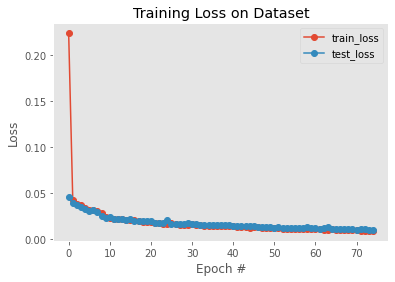

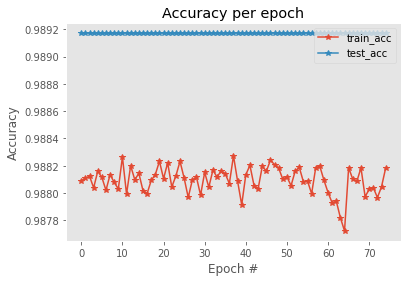

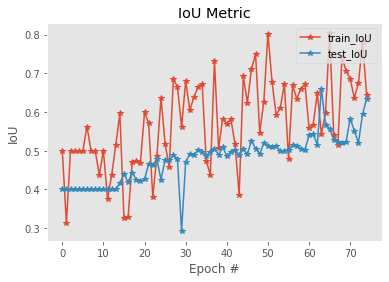

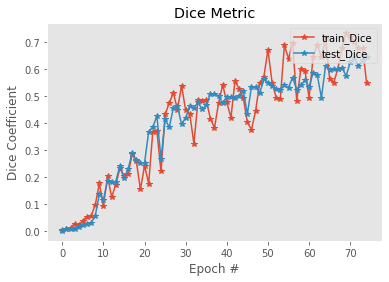

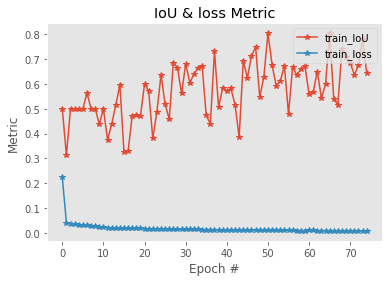

In [56]:
import matplotlib.pyplot as plt
# plot the training loss
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss", marker="o")
plt.plot(H["test_loss"], label="test_loss", marker="o")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.legend() 
plt.grid()
plt.savefig(config.LOSS_PLOT_PATH)

# plot the accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_acc"], label="train_acc", marker="*")
plt.plot(H["test_acc"],  label="test_acc", marker="*")
plt.title("Accuracy per epoch")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.grid()
plt.savefig(config.ACCURACY_PLOT_PATH)


# plot the IoU
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_iou"], label="train_IoU", marker="*")
plt.plot(H["test_iou"],  label="test_IoU", marker="*")
plt.title("IoU Metric")
plt.xlabel("Epoch #")
plt.ylabel("IoU")
plt.legend(loc="upper right")
plt.grid()
plt.savefig(config.IoU_PLOT_PATH)

# plot the Dice-coefficient
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_dice"], label="train_Dice", marker="*")
plt.plot(H["test_dice"],  label="test_Dice", marker="*")
plt.title("Dice Metric")
plt.xlabel("Epoch #")
plt.ylabel("Dice Coefficient")
plt.legend(loc="upper right")
plt.grid()
plt.savefig(config.DICE_PLOT_PATH )


# plot the Training IoU & Training Loss
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_iou"], label="train_IoU", marker="*")
plt.plot(H["train_loss"],  label="train_loss", marker="*")
plt.title("IoU & loss Metric")
plt.xlabel("Epoch #")
plt.ylabel("Metric")
plt.legend(loc="upper right")
plt.grid()

# serialize the model to disk
torch.save(unet, config.MODEL_PATH)

# Using Our Trained U-Net Model for Prediction - predict.py

we have trained and saved our segmentation model, we are ready to see it in action and use it for segmentation tasks.

In [57]:
# python predict.py
# import the necessary packages
from pyimagesearch import config
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2
import os

In [58]:
# To use our segmentation model for prediction, we will need a function that can take our trained model and test images, 
# predict the output segmentation mask and finally, visualize the output predictions.
def prepare_plot(origImage, origMask, predMask):
    # initialize our figure
    figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

    # plot the original image, its mask, and the predicted mask
    ax[0].imshow(origImage)
    ax[1].imshow(origMask)
    ax[2].imshow(predMask)
    
    # set the titles of the subplots
    ax[0].set_title("Image")
    ax[1].set_title("Original Mask")
    ax[2].set_title("Prediction")

    # set the layout of the figure and display it
    figure.tight_layout()
    figure.show()

In [59]:
def make_predictions(model, imagePath):
    # set model to evaluation mode
    model.eval()

    # turn off gradient tracking
    with torch.no_grad():
        # load the image from disk, swap its color channels, cast it
        # to float data type, and scale its pixel values
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype("float32") / 255.0 # by deviding 255, normalize its pixel values from the standard [0-255] to the range [0, 1],
        # which our model is trained to process

        # resize the image and make a copy of it for visualization
        image = cv2.resize(image, (128, 128))
        orig = image.copy()

        # find the filename and generate the path to ground truth mask ground truth
        #  we get the path to the ground-truth mask for our test image and load the mask
        filename = imagePath.split(os.path.sep)[-1]
        groundTruthPath = os.path.join(config.MASK_DATASET_PATH, filename)
        
        # load the ground-truth segmentation mask in grayscale mode and resize it
		# Now we process our image to a format that our model can process. 
		# currently, our image has the shape [128, 128, 3]. However, 
		# our segmentation model accepts four-dimensional inputs of the format [batch_dimension, channel_dimension, height, width]

        gtMask = cv2.imread(groundTruthPath, 0)
        gtMask = cv2.resize(gtMask, (config.INPUT_IMAGE_HEIGHT,
                config.INPUT_IMAGE_HEIGHT))
        
        # make the channel axis to be the leading one, add a batch
        # dimension, create a PyTorch tensor, and flash it to the current device
        image = np.transpose(image, (2, 0, 1)) # we transpose the image to convert it to channel-first format, that is, [3, 128, 128]
        # we add an extra dimension using the expand_dims function of numpy to convert our image into a 
		# four-dimensional array (i.e., [1, 3, 128, 128]). Note that the first dimension here represents the 
		# batch dimension equal to one since we are processing one test image at a time.
		# We then convert our image to a PyTorch tensor with the help of the
		# torch.from_numpy() function and move it to the device our model
        image = np.expand_dims(image, 0)
        image = torch.from_numpy(image).to(config.DEVICE)

        # make the prediction, pass the results through the sigmoid # apply the sigmoid activation to get our predictions in the range [0, 1]
        # function, and convert the result to a NumPy array
        predMask = model(image).squeeze()
        predMask = torch.sigmoid(predMask) 
        predMask = predMask.cpu().numpy()

        # filter out the weak predictions and convert them to integers
        # Since sigmoid outputs continuous values in the range [0, 1], we use our config.THRESHOLD
        #  to binarize our output and assign the pixels, values equal to 0 or 1. 
        # This implies that anything greater than the threshold will be assigned the value 1, and others will be assigned 0.

        # multiplying it with 255 makes the final pixel values in our predMask 
		# either 0 (i.e., pixel value for black color) or 255 (i.e., pixel value for white color)
        predMask = (predMask > config.THRESHOLD) * 255
        predMask = predMask.astype(np.uint8)
        
        # prepare a plot for visualization
        prepare_plot(orig, gtMask, predMask)
        


# Prection on test images

[INFO] loading up test image paths...
[INFO] load up model...


/var/folders/9p/zsp88fz934x50v0r2w5ywp7m0000gn/T/ipykernel_28172/3317793042.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
/var/folders/9p/zsp88fz934x50v0r2w5ywp7m0000gn/T/ipykernel_28172/3317793042.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))


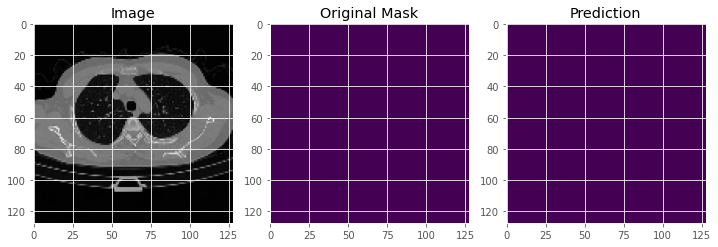

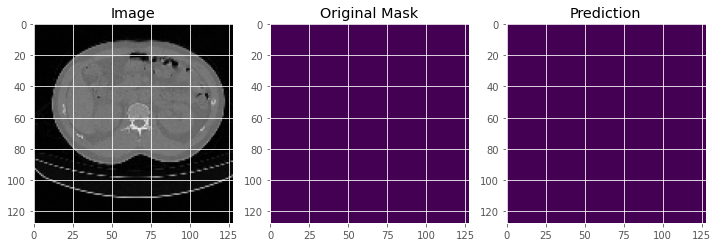

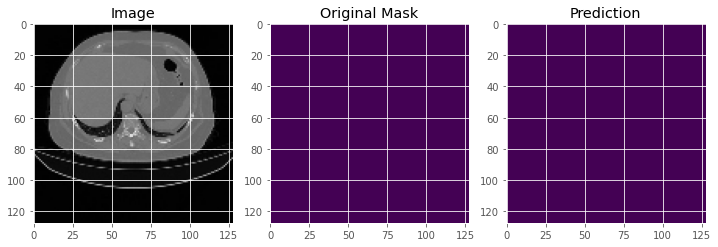

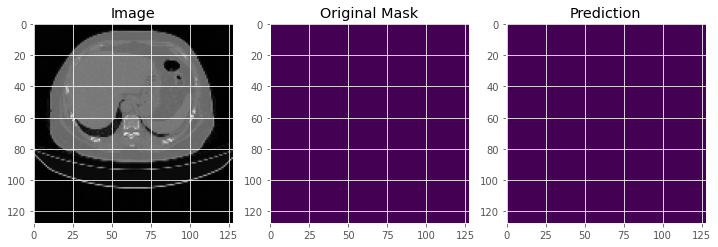

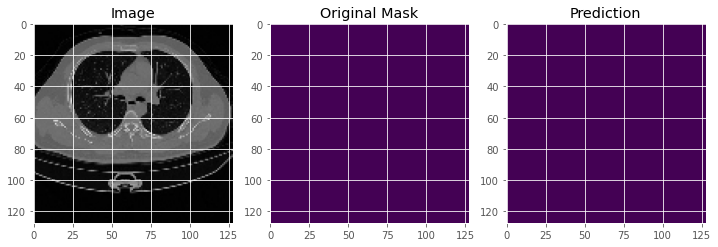

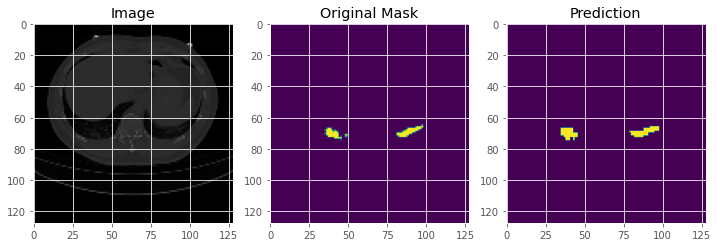

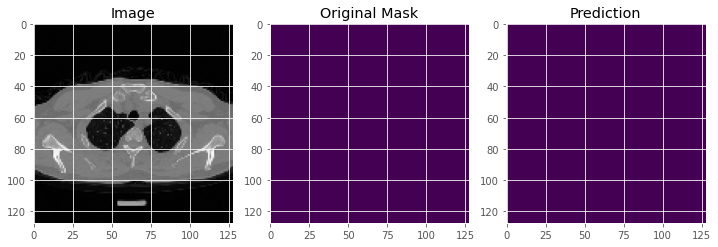

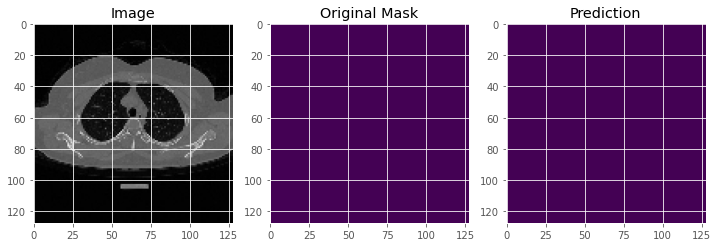

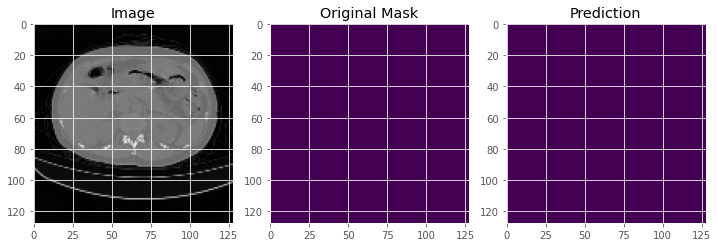

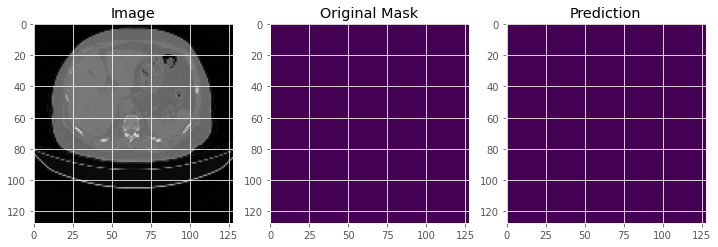

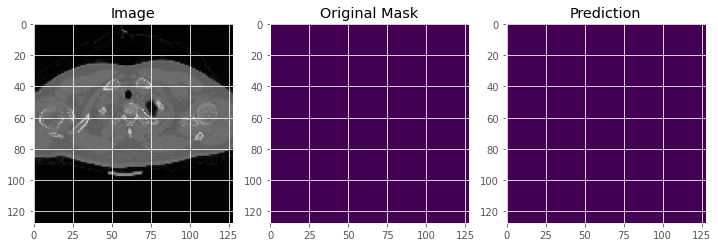

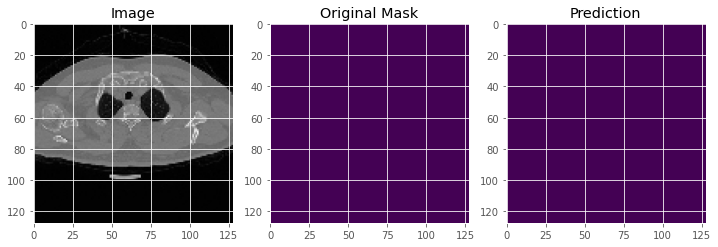

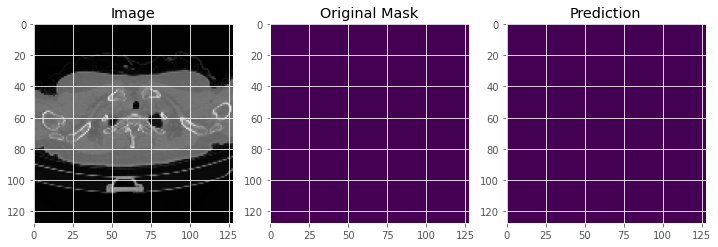

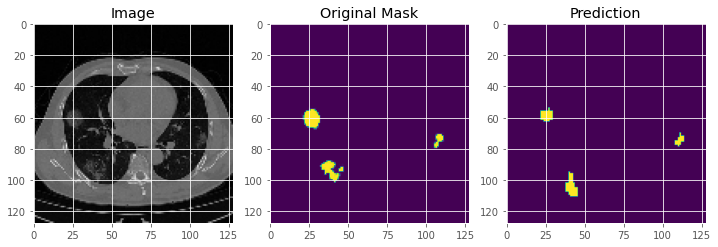

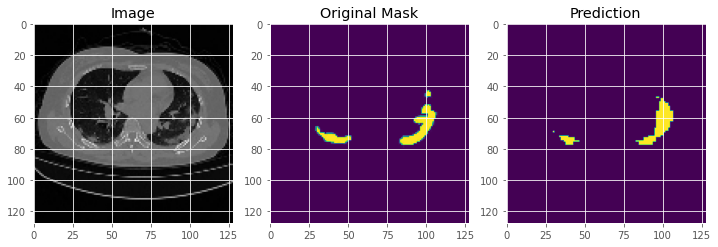

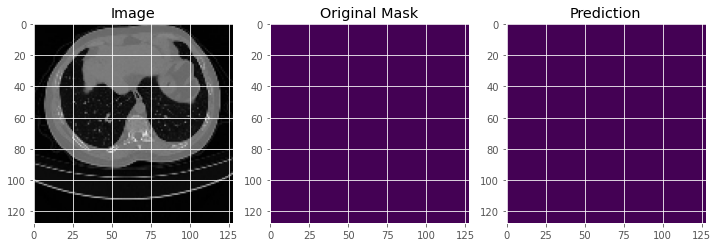

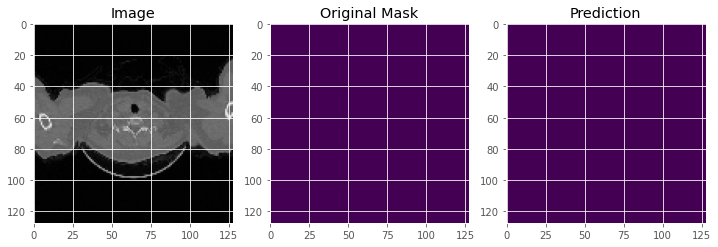

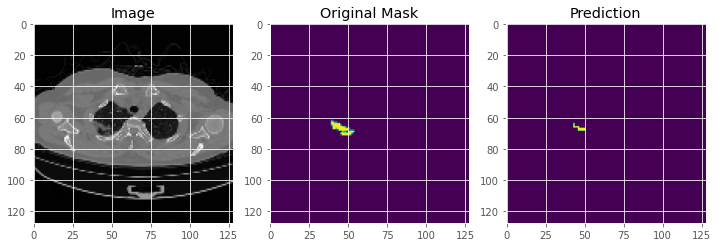

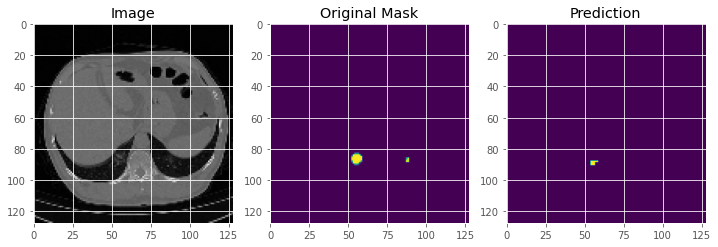

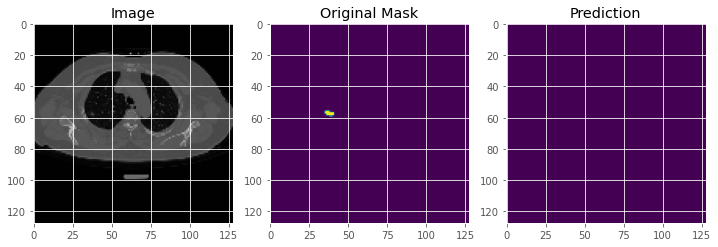

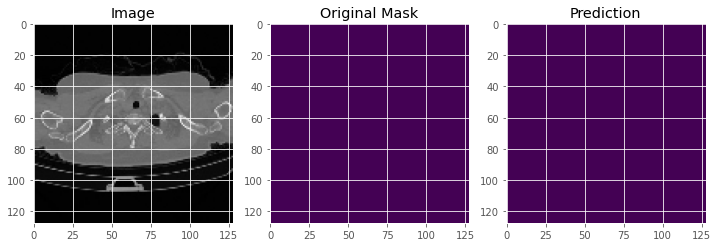

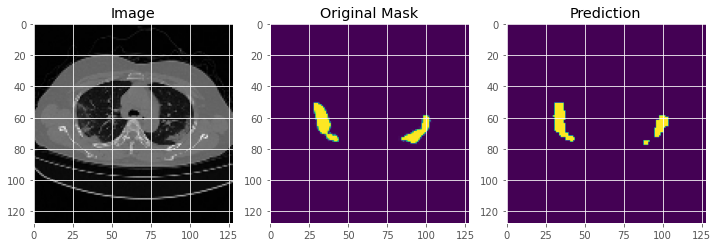

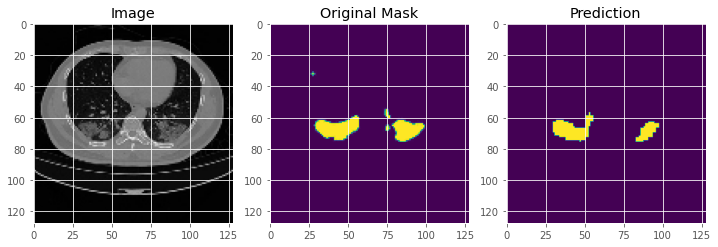

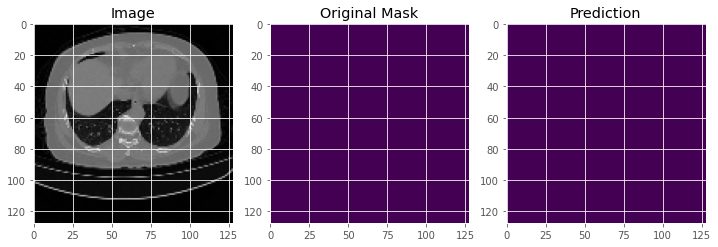

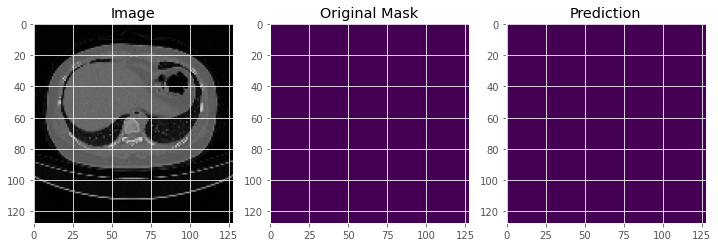

In [60]:
# below code is to see our model prediction 
# load the image paths in our testing file and randomly select 10 image paths
#  open the folder where our test image paths are stored and randomly grab 10 image paths
print("[INFO] loading up test image paths...")
imagePaths = open(config.TEST_PATHS).read().strip().split("\n")
imagePaths = np.random.choice(imagePaths, size=25)

# load our model from disk and flash it to the current device
# loads the trained weights of our U-Net from the saved checkpoint at config.MODEL_PATH
print("[INFO] load up model...")
unet = torch.load(config.MODEL_PATH).to(config.DEVICE)

# iterate over the randomly selected test image paths
for path in imagePaths:
    # make predictions and visualize the results
    # finally iterate over our randomly chosen test imagePaths and predict the outputs with the help of our make_prediction function
    make_predictions(unet, path)
